In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
models = ["Mistral", "Mistral Nemo", "Mistral Small", "Qwen8", "Qwen14", "Gemma12", "Gemma27"]
x = np.arange(len(models))
## Solo 

# Memory utilized (GB) for different scenarios
memory_data = {
    "SP": [1.02, 5.17, 9.51, 3.97, 6.50, 1.6, 2.3],
    "I-AGB": [2.80, 4.61, 9.17, 4.33, 6.12, 1.35, 2.28],
    "CH-AGB": [3.29, 4.49, 6.92, 2.03, 6.41, 1.21, 1.98],
    "CA-AGB": [3.32, 5.02, 7.78, 21.79, 6.55, 1.33, 2.18],
}

# Model acronyms (must match `models` order)
acronyms = ["M", "MN", "MS", "Q8", "Q14", "G12", "G27"]
scenarios = ["SP", "I-AGB", "CH-AGB", "CA-AGB"]


# Wall clock time (hours)
time_data = {
    "SP": [0 + 46/60 + 30/3600,
             1 + 12/60 + 49/3600,
             1 + 51/60 + 38/3600,
             1 + 31/60 + 21/3600,
             1 + 20/60 + 18/3600,
             2 + 12/60 + 30/3600,
             3 + 30/60 + 30/3600], 
    "I-AGB": [3 + 53/60 + 21/3600,
                   4 + 29/60 + 27/3600,
                   8 + 53/60 + 14/3600,
                   4 + 58/60 + 55/3600,
                   5 + 35/60 + 1/3600,
                   9 + 14/60 + 15/3600,
                     16 + 0/60 + 52/3600],
    "CH-AGB": [4 + 46/60 + 48/3600,
                  5 + 52/60 + 41/3600,
                  8 + 57/60 + 56/3600,
                  5 + 17/60 + 21/3600,
                  6 + 30/60 + 33/3600,
                  7 + 38/60 + 59/3600,
                  12 + 34/60 + 21/3600],
    "CA-AGB": [7 + 10/60 + 33/3600,
                8 + 36/60 + 46/3600,
                15 + 25/60 + 44/3600,
                6 + 48/60 + 8/3600,
                6 + 47/60 + 36/3600,
                13 + 23/60 + 00/3600,
                22 + 1/60 + 52/3600],
}

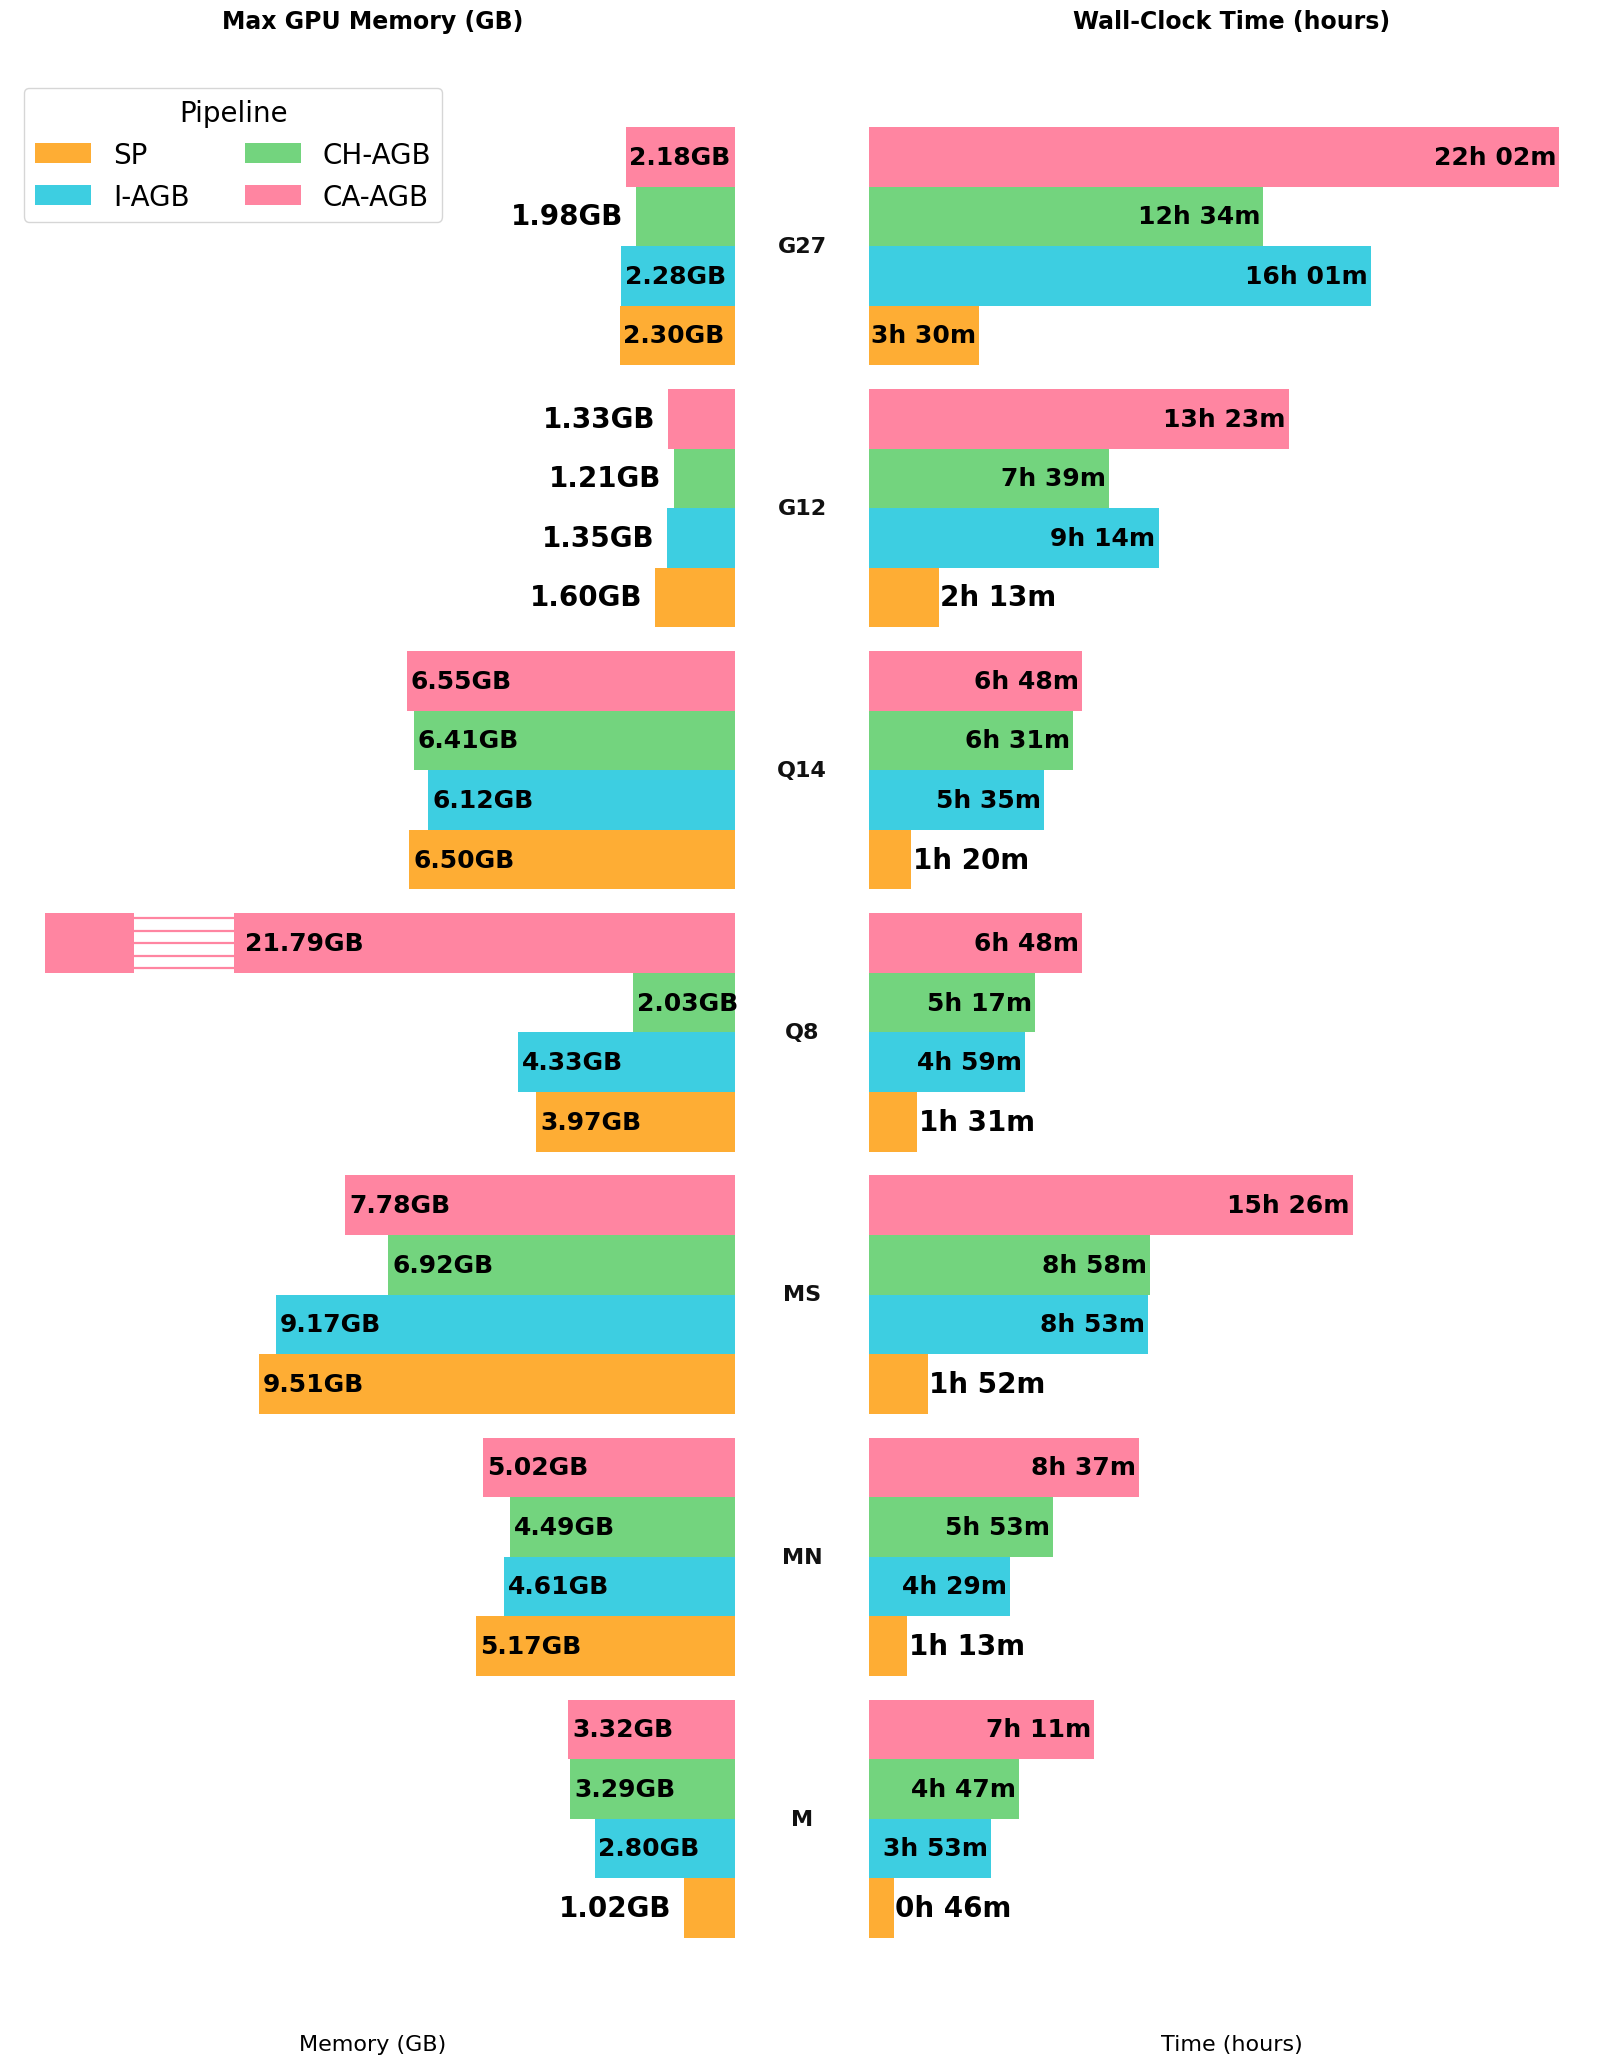

In [6]:
from matplotlib.patches import Patch
import numpy as np
import matplotlib.pyplot as plt

# SETTINGS
bar_height    = 0.25
group_gap     = 0.1
font_inside   = 18
font_outside  = 20
font_ylabel   = 16
font_acronym  = 16  # <-- SIZE OF ACRONYMS BETWEEN
font_title    = 17
legend_loc    = 'lower left'
legend_ncol   = 2
legend_bbox   = (0.0, 0.9)
color_inside  = 'black'
color_outside = 'black'
color_acronym = '#111'   # strong dark gray/black
figsize       = (18, 24)


n_models = len(models)
n_scenarios = len(scenarios)
colors = ['#FEAD34', '#3DCEE1', '#73D47E', '#FF85A1']

handles = [
    Patch(facecolor=colors[i], edgecolor='none', label=scenarios[i])
    for i in range(n_scenarios)
]

# BUILD Y-POSITIONS WITH GROUP GAP
ys = []
yticks = []
for i, model in enumerate(models):
    for j in range(n_scenarios):
        ys.append(i * (n_scenarios * bar_height + group_gap) + j * bar_height)
    yticks.append(i * (n_scenarios * bar_height + group_gap) + (n_scenarios-1)/2 * bar_height)

# --- PLOTS ---
fig = plt.figure(figsize=figsize)
# left, center, right: memory, acronyms, time
gs = fig.add_gridspec(1, 3, width_ratios=[2.6, 0.3, 2.6], wspace=0.05)
ax_mem  = fig.add_subplot(gs[0, 0])
ax_acr  = fig.add_subplot(gs[0, 1], sharey=ax_mem)
ax_time = fig.add_subplot(gs[0, 2], sharey=ax_mem)

# MEMORY
for i, scenario in enumerate(scenarios):
    bar_pos = [y + i * bar_height for y in np.arange(n_models) * (n_scenarios * bar_height + group_gap)]
    for j, pos in enumerate(bar_pos):
        val = memory_data[scenario][j]
        if i == 3 and j == 3 and val > 15:  # only for Qwen8 CA-AGB
            # Draw two bars for break, plus zigzag (as you did above)
            left = 10
            right = 12.0
            # First segment
            ax_mem.barh(pos, left, height=bar_height, color=colors[i], zorder=3)
            # Second segment
            ax_mem.barh(pos, val-right-8, left=right, height=bar_height, color=colors[i], zorder=3)
            # Draw break marker
            for offset in np.linspace(0.02, bar_height-0.02, 5):
                ax_mem.plot([left, left+2], [pos-bar_height/2+offset, pos-bar_height/2+offset],
                            color='#FF85A1', lw=1.6, clip_on=False)
            # Annotate at end
            ax_mem.text(val-12, pos, f"{val:.2f}GB", va='center', ha='left',
                        color=color_inside, fontsize=font_inside, fontweight='bold')
        else:
            # Normal bar
            ax_mem.barh(pos, val, height=bar_height, color=colors[i], zorder=2)
            if val > 2:
                ax_mem.text(val-2.1, pos, f"{val:.2f}GB", va='center', ha='right',
                            color=color_inside, fontsize=font_inside, fontweight='bold')
            else:
                ax_mem.text(val+2.5, pos, f"{val:.2f}GB", va='center', ha='left',
                            color=color_outside, fontsize=font_outside, fontweight='bold')
ax_mem.set_title('Max GPU Memory (GB)', fontsize=font_title, weight='bold')
ax_mem.set_xlabel('Memory (GB)', fontsize=font_ylabel)
ax_mem.set_xlim(ax_mem.get_xlim()[::-1])
ax_mem.set_ylabel('')
ax_mem.set_yticks(yticks)
ax_mem.set_yticklabels(models, fontsize=font_ylabel)
ax_mem.grid(axis='x', linestyle=':', alpha=0.5)
ax_mem.tick_params(axis='y', which='both', left=False)
ax_mem.legend(
    handles=handles,
    loc=legend_loc,
    bbox_to_anchor=legend_bbox,
    ncol=legend_ncol,
    fontsize=font_outside,
    title="Pipeline",
    title_fontsize=20
)

# TIME
for i, scenario in enumerate(scenarios):
    bar_pos = [y + i * bar_height for y in np.arange(n_models) * (n_scenarios * bar_height + group_gap)]
    bars = ax_time.barh(bar_pos, time_data[scenario], height=bar_height, color=colors[i], label=scenario)
    for bar, val in zip(bars, time_data[scenario]):
        hours = int(val)
        mins = int(round((val - hours) * 60))
        label = f"{hours}h {mins:02}m"
        if bar.get_width() > 2.5:
            xpos = bar.get_width() - 0.1
            ax_time.text(xpos, bar.get_y() + bar.get_height()/2, label,
                         va='center', ha='right', color=color_inside, fontsize=font_inside, fontweight='bold')
        else:
            ax_time.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, label,
                         va='center', ha='left', color=color_outside, fontsize=font_outside, fontweight='bold')
ax_time.set_title('Wall-Clock Time (hours)', fontsize=font_title, weight='bold')
ax_time.set_xlabel('Time (hours)', fontsize=font_ylabel)
ax_time.set_yticks(yticks)
ax_time.set_yticklabels([])
ax_time.grid(axis='x', linestyle=':', alpha=0.5)

for ax in (ax_mem, ax_time, ax_acr):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])

ax_acr.set_yticks([])
ax_acr.set_yticklabels([])
ax_acr.set_frame_on(False)

# --- DRAW ACRONYMS AS TEXT ---
for i, ytick in enumerate(yticks):
    ax_acr.text(0.5, ytick, acronyms[i],
                ha='center', va='center',
                fontsize=font_acronym, fontweight='bold', color=color_acronym,
                transform=ax_acr.transData, clip_on=False)

ax_acr.set_xlim(0, 1)
ax_acr.set_ylim(ax_mem.get_ylim())
ax_acr.axis('off')

# fig.suptitle('Model Resource Use by Scenario', fontsize=font_title+2, weight='bold', y=1.01)
plt.subplots_adjust(left=0.10, right=0.98, top=0.90, bottom=0.07, wspace=0.05)
plt.show()


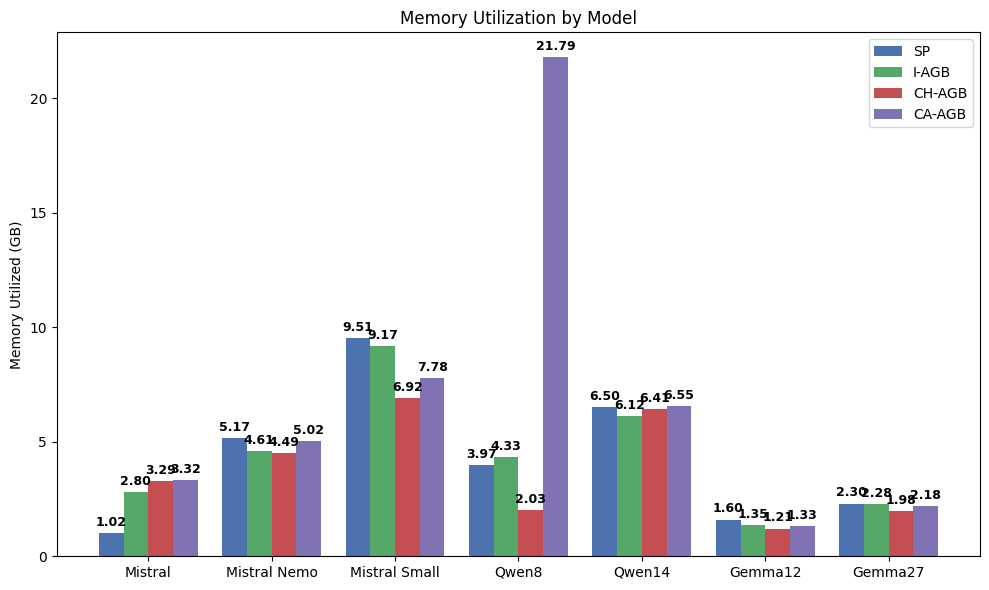

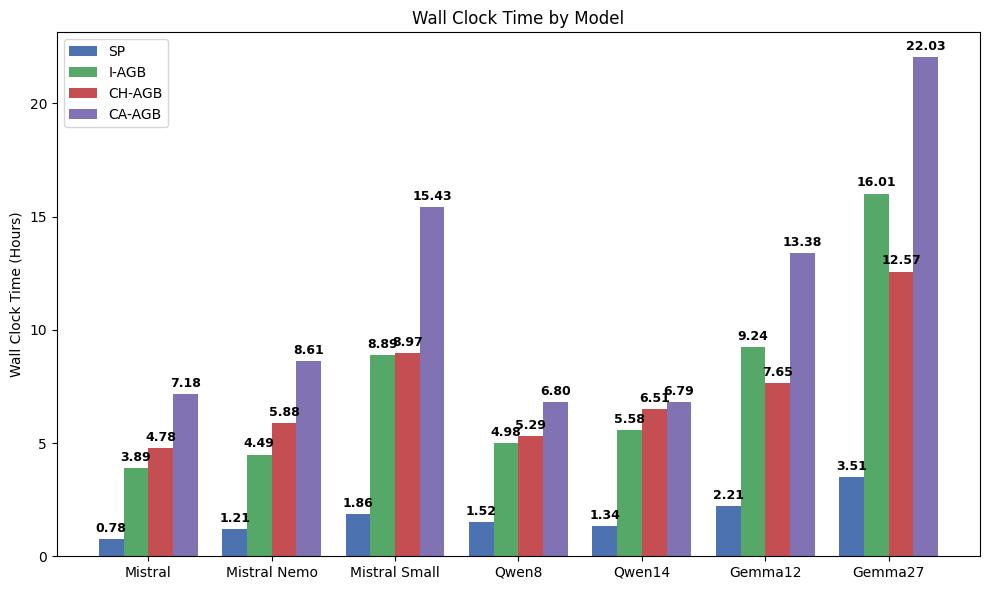

In [4]:
# Replotting with value labels on top of bars
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

# Function to add value labels on bars
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Memory Utilization Chart with labels
fig1, ax1 = plt.subplots(figsize=(10, 6))
bars_group1 = []
for i, (key, values) in enumerate(memory_data.items()):
    width = 0.2  # Width of each bar
    bars = ax1.bar(x + i*width - 1.5*width, values, width=width, label=key, color=colors[i])
    bars_group1.extend(bars)
    add_labels(ax1, bars)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylabel("Memory Utilized (GB)")
ax1.set_title("Memory Utilization by Model")
ax1.legend()
plt.tight_layout()

# Wall Clock Time Chart with labels
fig2, ax2 = plt.subplots(figsize=(10, 6))
bars_group2 = []
for i, (key, values) in enumerate(time_data.items()):
    bars = ax2.bar(x + i*width - 1.5*width, values, width=width, label=key, color=colors[i])
    bars_group2.extend(bars)
    add_labels(ax2, bars)
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylabel("Wall Clock Time (Hours)")
ax2.set_title("Wall Clock Time by Model")
ax2.legend()
plt.tight_layout()

plt.show()
